(**You can also open this notebook in Google Colab**)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-fall/2023-10-24/notebook/code_demo.ipynb)

# Recap on `matplotlib`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
x = np.linspace(0,1,100)
y = np.exp(x)

## Single-axes, function based (`plt.xxx()`)

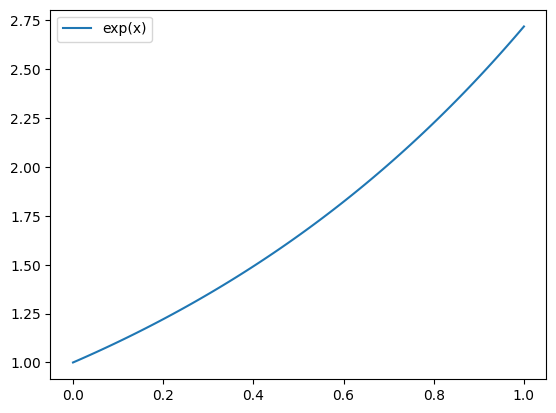

In [3]:
plt.plot(x, y, label='exp(x)')
plt.legend()
plt.show()

## Multi-axes, oop styled (`axes.xxx()`)

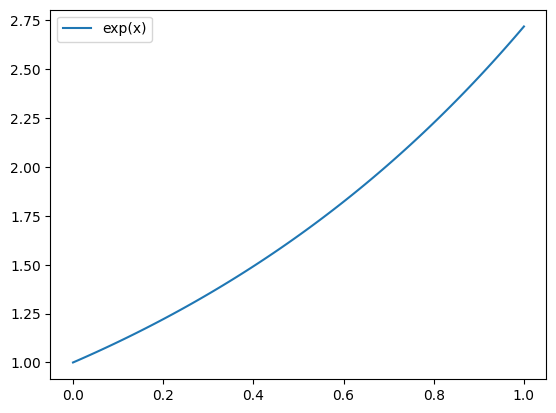

In [4]:
fig, axes = plt.subplots()
axes.plot(x, y, label='exp(x)')
axes.legend()
plt.show()

# Visualization with `seaborn`

`Seaborn` is a library for making statistical graphics in Python. It builds on top of `matplotlib` and integrates closely with pandas data structures.

`Seaborn` helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API **lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them**.

## Import the core library

In [5]:
import seaborn as sns

## Overview

This plot shows the relationship between five variables in the tips dataset using a single call to the `seaborn` function `relplot()`

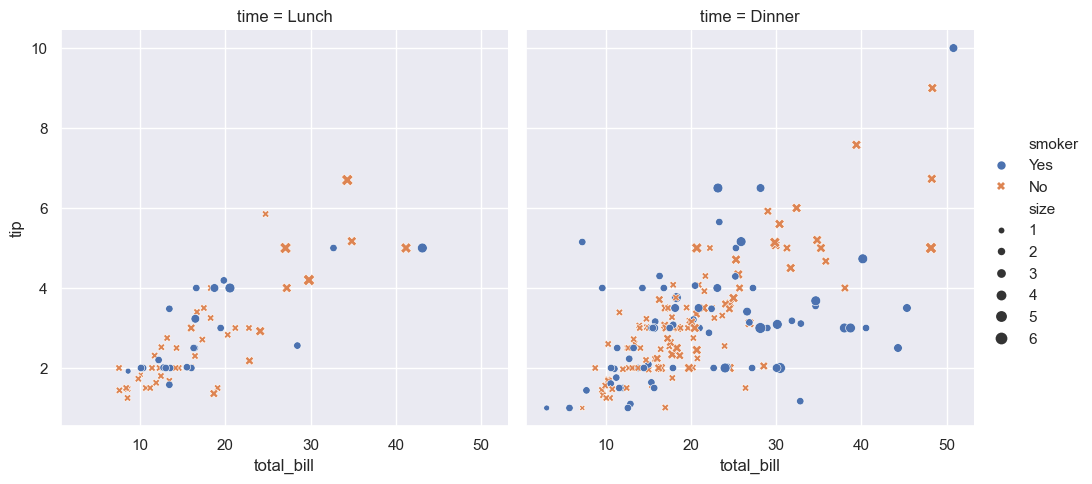

In [7]:
# Apply the default theme, for other options check https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
plt.show()

In [10]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


About `sns.relplot`: https://seaborn.pydata.org/generated/seaborn.relplot.html

```python
seaborn.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
```

Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

* `scatterplot()` (with kind="scatter"; the default)
* `lineplot()` (with kind="line")

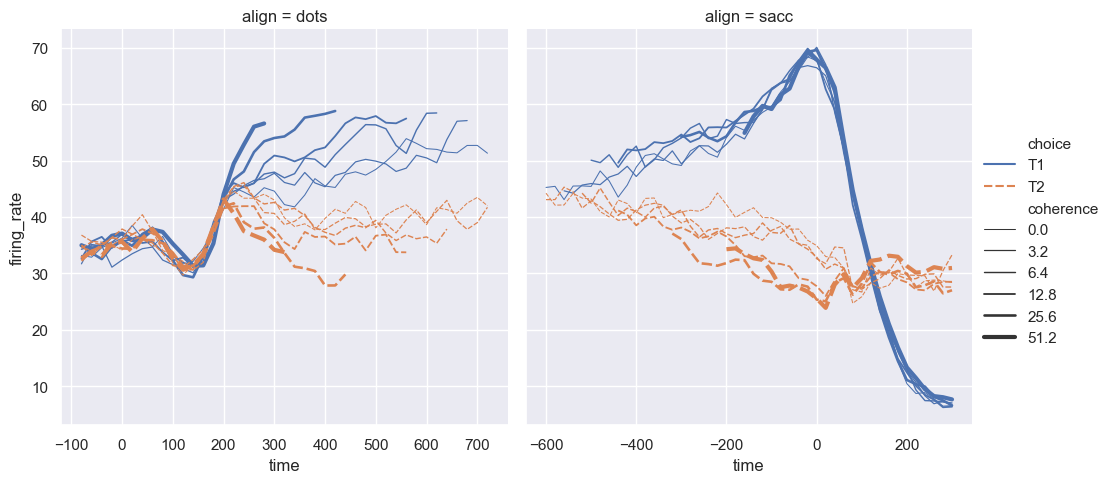

In [8]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show()

A list of `seaborn`'s built-in datasets: https://github.com/mwaskom/seaborn-data

In [11]:
dots.head(3)

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840


## Statistical estimation

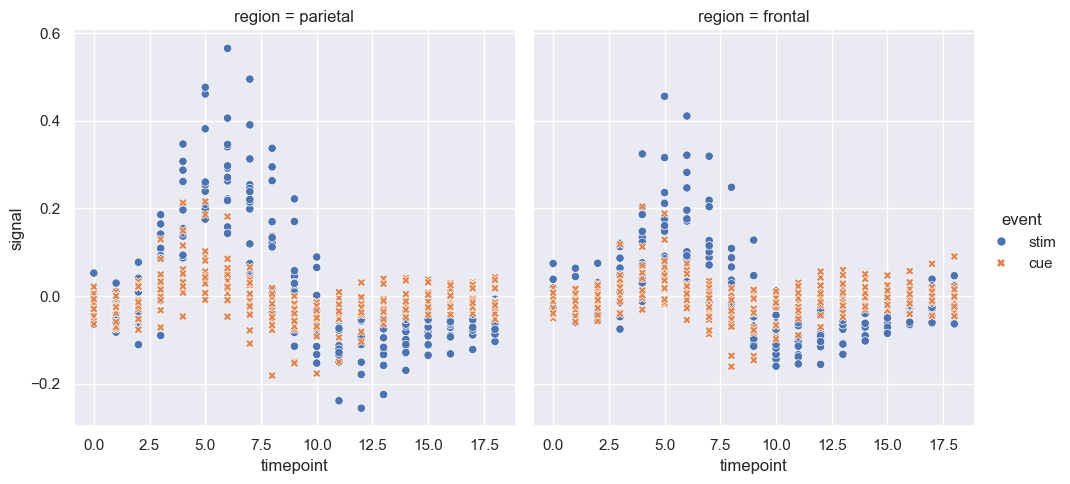

In [13]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri,
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show()

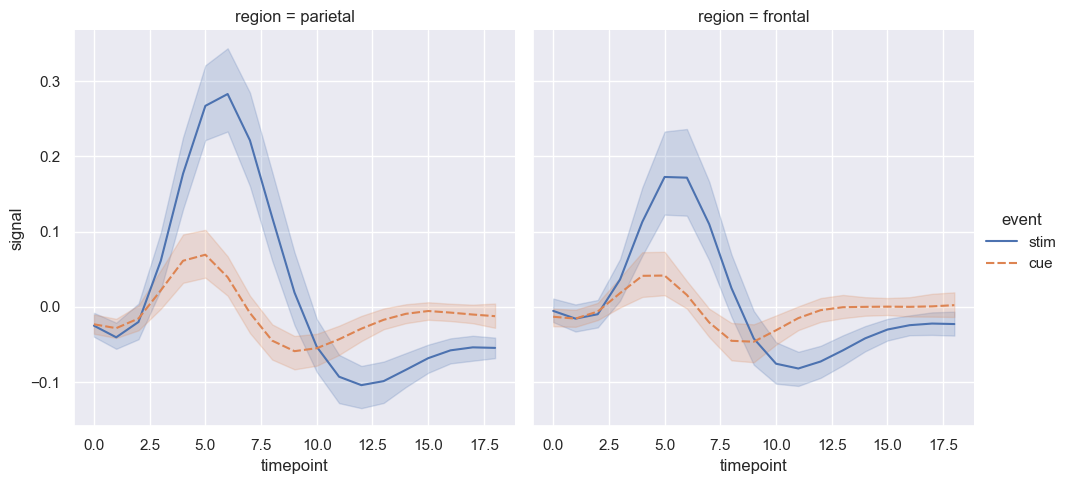

In [14]:
# mean and confidence intervals are presented automatically
sns.relplot(
    data=fmri, kind='line',
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show()

## Distributional representations

The `seaborn` function `displot()` supports several approaches to visualizing distributions. 

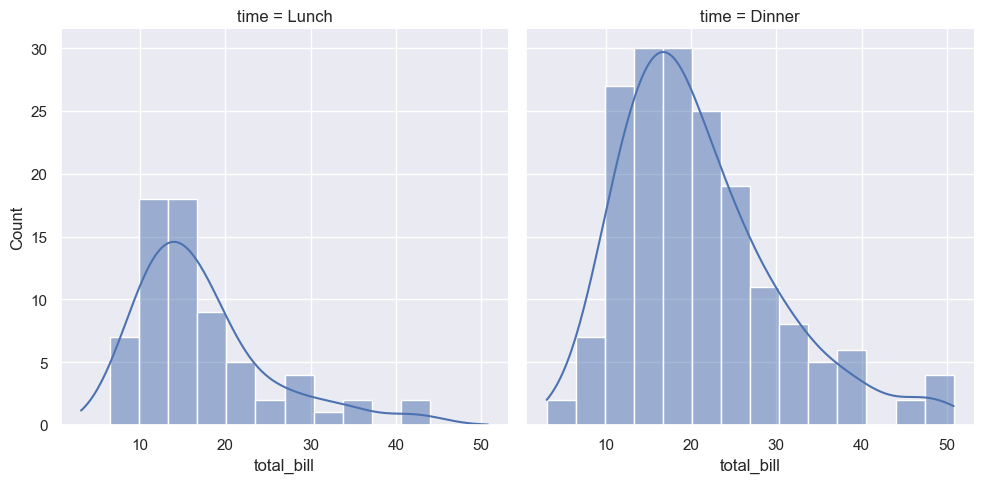

In [16]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)
plt.show()

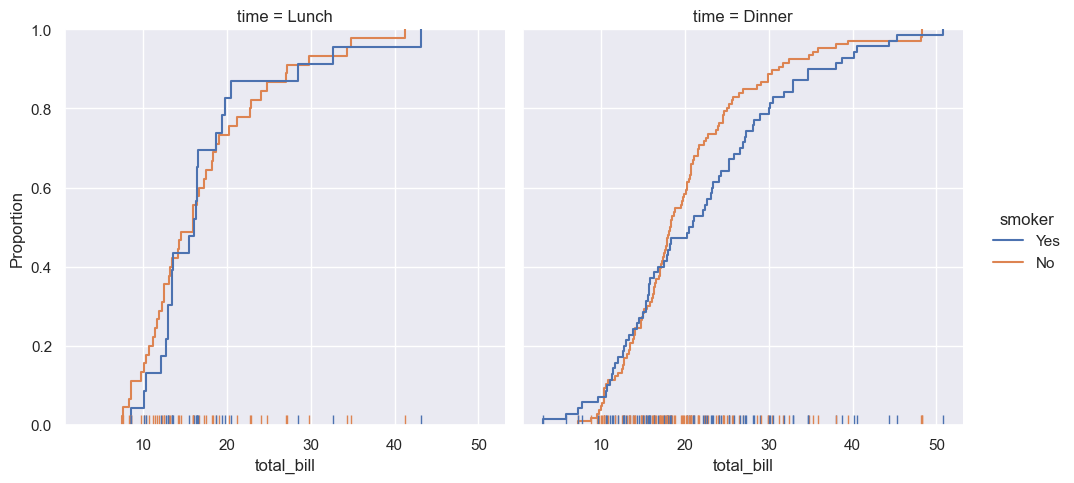

In [18]:
# Empirical cumulative distribution (ECD) function is also supported

sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)
plt.show()

## Plots for categorical variables

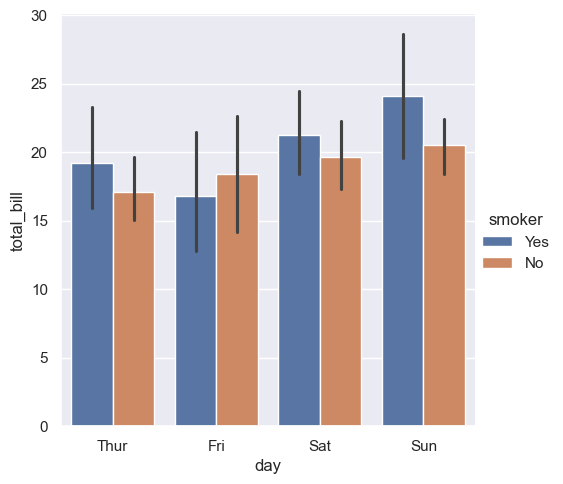

In [25]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")
plt.show()

In [20]:
penguins = sns.load_dataset("penguins")
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


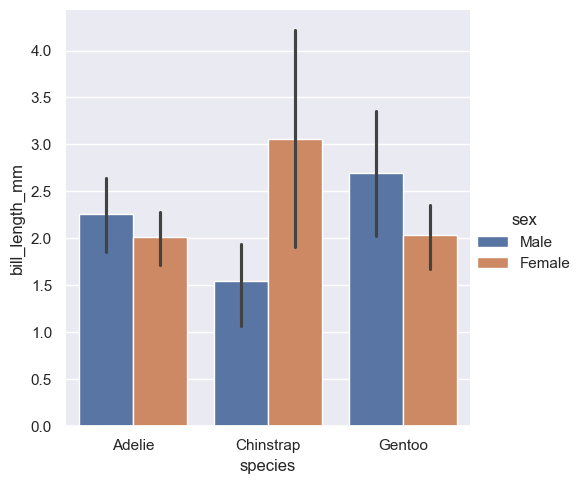

In [23]:
# More details on sns.catplot(), check https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(data=penguins, kind="bar", x="species", y="bill_length_mm", hue="sex", estimator=np.std)
plt.show()

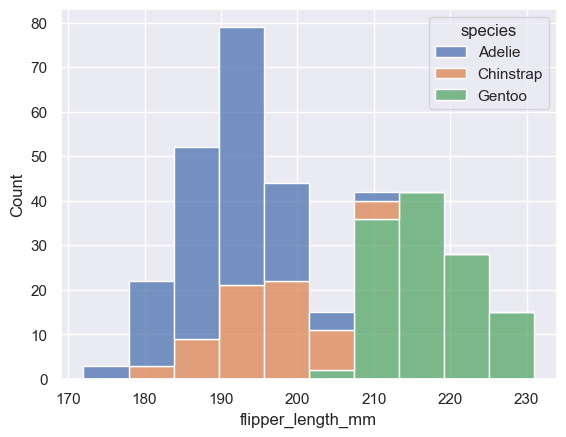

In [29]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

## Multivariate views on complex datasets

`jointplot()`, focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution

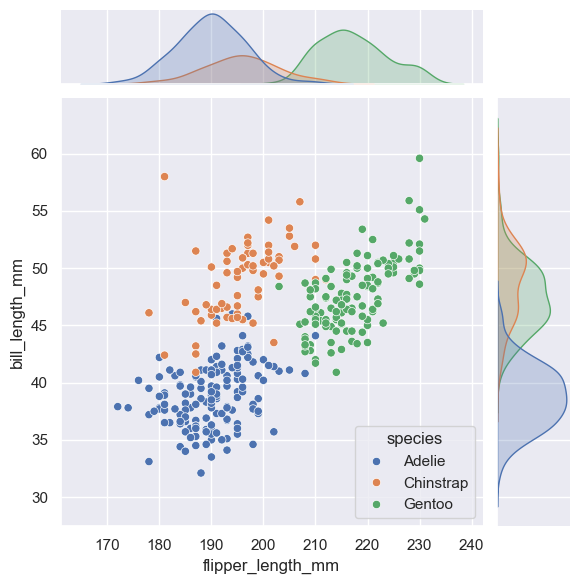

In [26]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

`pairplot()`, takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable

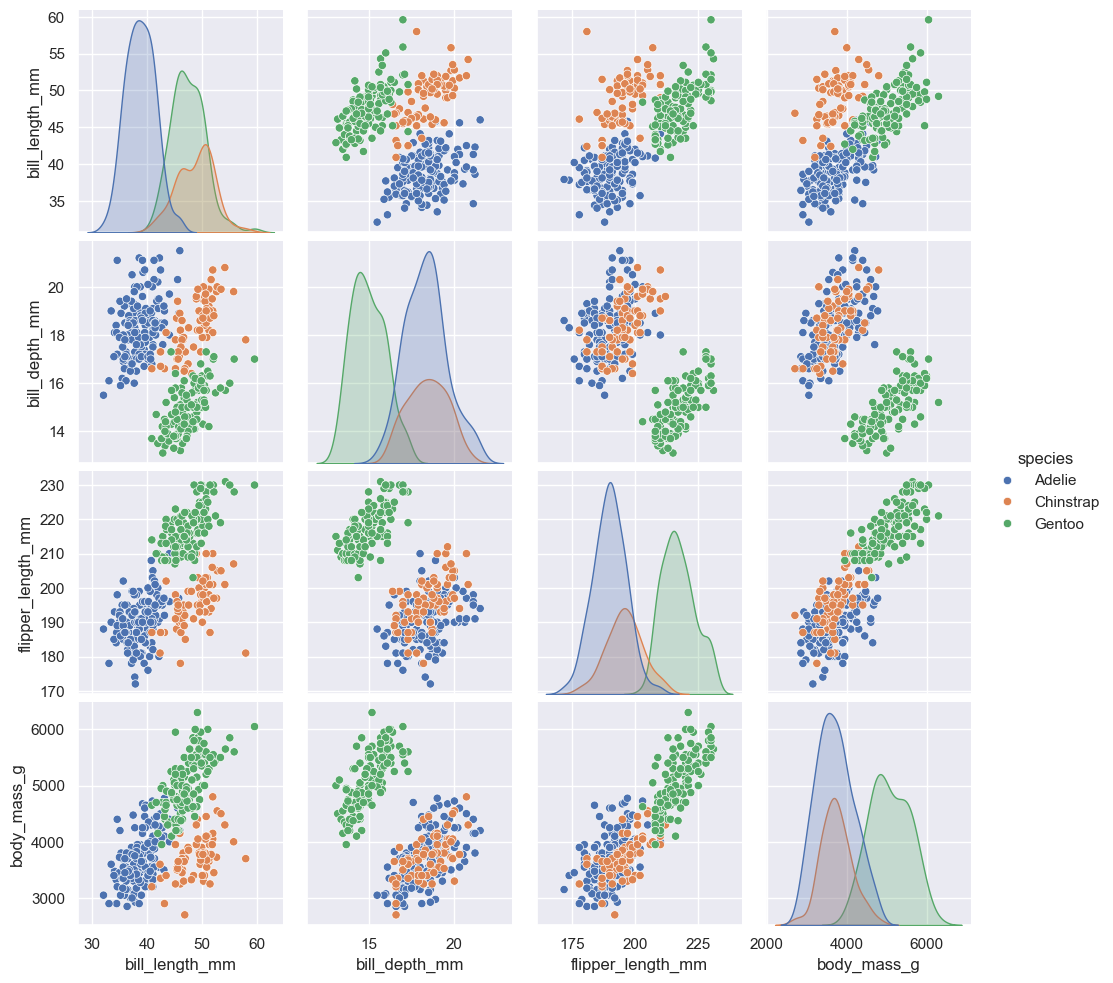

In [27]:
sns.pairplot(data=penguins, hue="species")
plt.show()

## Some fine controls

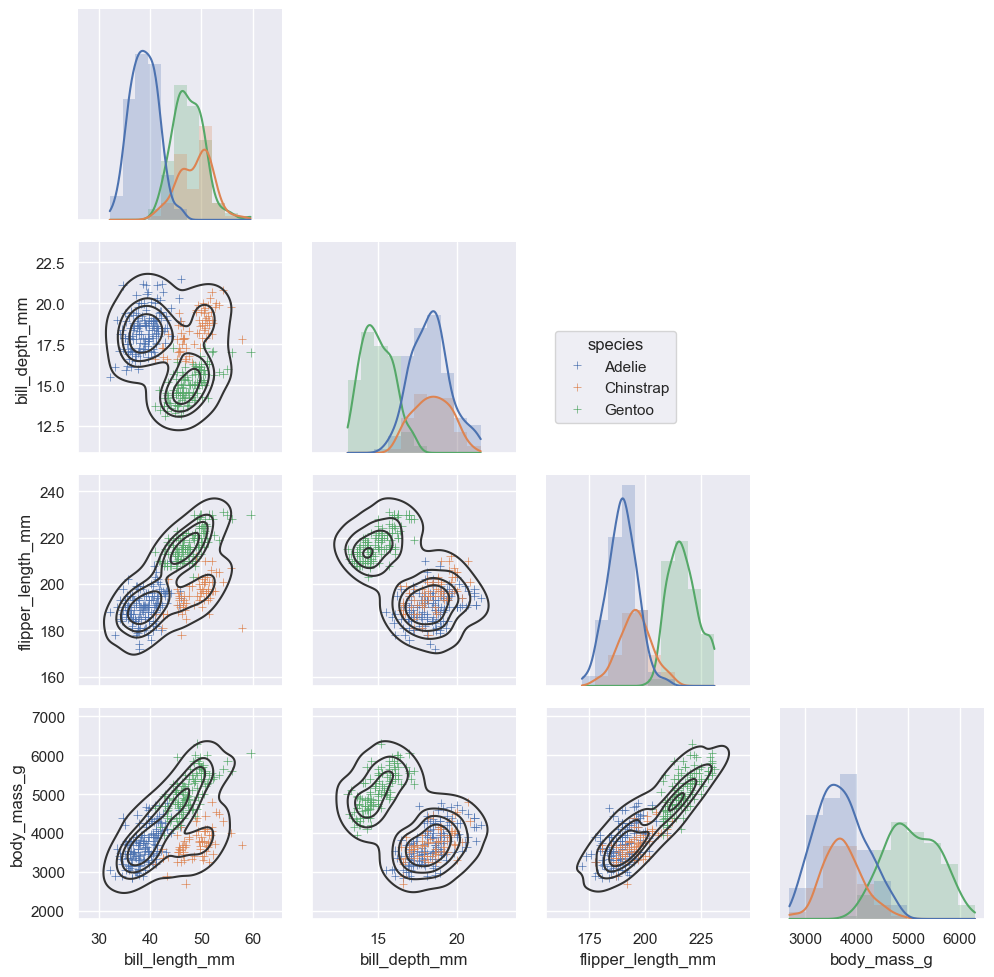

In [28]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))
plt.show()

## `Seaborn` plot functions
- Most of your interactions with seaborn will happen through a set of plotting functions
- The seaborn namespace is flat; all of the functionality is accessible at the top level.

### Similar functions for similar tasks

https://seaborn.pydata.org/api.html#distribution-api

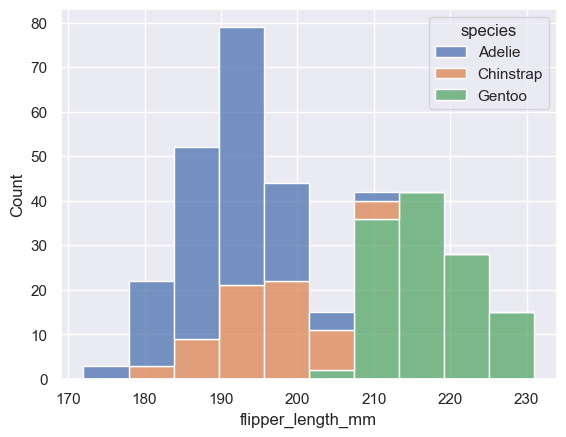

In [30]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

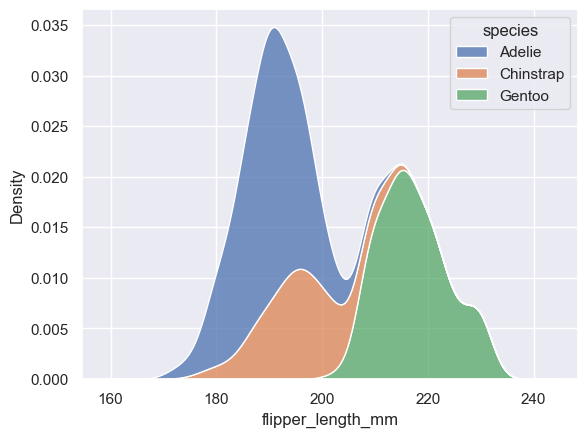

In [31]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()